In [71]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [72]:
df=pd.read_csv('file:///F:/BRCA.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [73]:
df.shape

(334, 16)

In [74]:
df=df.drop(['Patient_ID','Date_of_Last_Visit','Date_of_Surgery'],axis='columns')

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
la=LabelEncoder()

In [77]:
df['Gender']=la.fit_transform(df['Gender'])
df['Histology']=la.fit_transform(df['Histology'])
df['ER status']=la.fit_transform(df['ER status'])
df['PR status']=la.fit_transform(df['PR status'])
df['HER2 status']=la.fit_transform(df['HER2 status'])
df['Surgery_type']=la.fit_transform(df['Surgery_type'])


In [78]:
df.dtypes

Age                 int64
Gender              int32
Protein1          float64
Protein2          float64
Protein3          float64
Protein4          float64
Tumour_Stage       object
Histology           int32
ER status           int32
PR status           int32
HER2 status         int32
Surgery_type        int32
Patient_Status     object
dtype: object

In [79]:
dummies=pd.get_dummies(df['Patient_Status'])

In [80]:
df=pd.concat([df,dummies],axis='columns')

In [81]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Alive,Dead
0,36,0,0.080353,0.42638,0.54715,0.273680,III,0,0,0,0,1,Alive,1,0
1,43,0,-0.420320,0.57807,0.61447,-0.031505,II,2,0,0,0,0,Dead,0,1
2,69,0,0.213980,1.31140,-0.32747,-0.234260,III,0,0,0,0,2,Alive,1,0
3,56,0,0.345090,-0.21147,-0.19304,0.124270,II,0,0,0,0,1,Alive,1,0
4,56,0,0.221550,1.90680,0.52045,-0.311990,II,0,0,0,0,2,Dead,0,1


In [82]:
df=df.drop(['Patient_Status','Dead'],axis='columns')

In [83]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Alive
0,36,0,0.080353,0.42638,0.54715,0.273680,III,0,0,0,0,1,1
1,43,0,-0.420320,0.57807,0.61447,-0.031505,II,2,0,0,0,0,0
2,69,0,0.213980,1.31140,-0.32747,-0.234260,III,0,0,0,0,2,1
3,56,0,0.345090,-0.21147,-0.19304,0.124270,II,0,0,0,0,1,1
4,56,0,0.221550,1.90680,0.52045,-0.311990,II,0,0,0,0,2,0


In [84]:
df=df.rename({'Alive':'Patient_Status'},axis='columns')

In [85]:
dummies=pd.get_dummies(df['Tumour_Stage'])

In [86]:
df=pd.concat([df,dummies],axis='columns')

In [87]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,I,II,III
0,36,0,0.080353,0.42638,0.54715,0.273680,III,0,0,0,0,1,1,0,0,1
1,43,0,-0.420320,0.57807,0.61447,-0.031505,II,2,0,0,0,0,0,0,1,0
2,69,0,0.213980,1.31140,-0.32747,-0.234260,III,0,0,0,0,2,1,0,0,1
3,56,0,0.345090,-0.21147,-0.19304,0.124270,II,0,0,0,0,1,1,0,1,0
4,56,0,0.221550,1.90680,0.52045,-0.311990,II,0,0,0,0,2,0,0,1,0


In [88]:
df=df.drop(['Tumour_Stage','I'],axis='columns')

In [89]:
df=df.rename({'III':'Tumour_Stage'},axis='columns')

In [90]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,II,Tumour_Stage
0,36,0,0.080353,0.42638,0.54715,0.273680,0,0,0,0,1,1,0,1
1,43,0,-0.420320,0.57807,0.61447,-0.031505,2,0,0,0,0,0,1,0
2,69,0,0.213980,1.31140,-0.32747,-0.234260,0,0,0,0,2,1,0,1
3,56,0,0.345090,-0.21147,-0.19304,0.124270,0,0,0,0,1,1,1,0
4,56,0,0.221550,1.90680,0.52045,-0.311990,0,0,0,0,2,0,1,0


In [91]:
df=df.rename({'II':'Tumour_Stage'},axis='columns')

In [92]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Tumour_Stage,Tumour_Stage
0,36,0,0.080353,0.42638,0.54715,0.273680,0,0,0,0,1,1,0,1
1,43,0,-0.420320,0.57807,0.61447,-0.031505,2,0,0,0,0,0,1,0
2,69,0,0.213980,1.31140,-0.32747,-0.234260,0,0,0,0,2,1,0,1
3,56,0,0.345090,-0.21147,-0.19304,0.124270,0,0,0,0,1,1,1,0
4,56,0,0.221550,1.90680,0.52045,-0.311990,0,0,0,0,2,0,1,0


In [99]:
df.shape

(334, 14)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             334 non-null    int64  
 1   Gender          334 non-null    int32  
 2   Protein1        334 non-null    float64
 3   Protein2        334 non-null    float64
 4   Protein3        334 non-null    float64
 5   Protein4        334 non-null    float64
 6   Histology       334 non-null    int32  
 7   ER status       334 non-null    int32  
 8   PR status       334 non-null    int32  
 9   HER2 status     334 non-null    int32  
 10  Surgery_type    334 non-null    int32  
 11  Patient_Status  334 non-null    uint8  
 12  Tumour_Stage    334 non-null    uint8  
 13  Tumour_Stage    334 non-null    uint8  
dtypes: float64(4), int32(6), int64(1), uint8(3)
memory usage: 22.0 KB


In [101]:
df.infer_objects()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Tumour_Stage,Tumour_Stage
0,36,0,0.080353,0.42638,0.54715,0.273680,0,0,0,0,1,1,0,1
1,43,0,-0.420320,0.57807,0.61447,-0.031505,2,0,0,0,0,0,1,0
2,69,0,0.213980,1.31140,-0.32747,-0.234260,0,0,0,0,2,1,0,1
3,56,0,0.345090,-0.21147,-0.19304,0.124270,0,0,0,0,1,1,1,0
4,56,0,0.221550,1.90680,0.52045,-0.311990,0,0,0,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36,0,0.231800,0.61804,-0.55779,-0.517350,0,0,0,1,3,0,0,1
330,44,1,0.732720,1.11170,-0.26952,-0.354920,1,0,0,0,2,0,1,0
331,61,0,-0.719470,2.54850,-0.15024,0.339680,0,0,0,0,0,0,1,0
332,79,0,0.479400,2.05590,-0.53136,-0.188480,0,0,0,1,0,0,0,0


In [102]:
df.describe()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Tumour_Stage,Tumour_Stage
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0,334.0,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,0.011976,-0.029991,0.946896,-0.090204,0.009819,0.338323,0.0,0.0,0.086826,1.517964,0.763473,0.565868,0.242515
std,12.961212,0.108941,0.563588,0.911637,0.585175,0.629055,0.544615,0.0,0.0,0.282003,1.024317,0.425587,0.496386,0.429247
min,29.000000,0.000000,-2.340900,-0.978730,-1.627400,-2.025500,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,-0.358888,0.362173,-0.513748,-0.377090,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000
50%,58.000000,0.000000,0.006129,0.992805,-0.173180,0.041768,0.000000,0.0,0.0,0.000000,2.000000,1.000000,1.000000,0.000000
75%,68.000000,0.000000,0.343598,1.627900,0.278353,0.425630,1.000000,0.0,0.0,0.000000,2.000000,1.000000,1.000000,0.000000
max,90.000000,1.000000,1.593600,3.402200,2.193400,1.629900,2.000000,0.0,0.0,1.000000,3.000000,1.000000,1.000000,1.000000


In [104]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Age,12.0,0.055640,0.303535,-0.136983,-0.055376,-0.024152,0.017119,1.0
Gender,12.0,0.100566,0.287144,-0.033949,-0.006191,0.013142,0.034775,1.0
Protein1,12.0,0.117494,0.307461,-0.129482,-0.054123,0.035447,0.172486,1.0
Protein2,12.0,0.061643,0.330579,-0.415825,-0.052215,-0.005744,0.038866,1.0
Protein3,12.0,0.033069,0.328916,-0.415825,-0.043855,-0.018761,0.013099,1.0
Protein4,12.0,0.108928,0.298743,-0.129834,-0.020013,0.016082,0.089732,1.0
Histology,12.0,0.080595,0.295603,-0.108969,-0.026536,0.001686,0.041923,1.0
ER status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PR status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HER2 status,12.0,0.072859,0.299268,-0.093782,-0.042859,-0.017846,0.020171,1.0


In [105]:
df=df.fillna(0)

In [106]:
df.min()

Age               29.00000
Gender             0.00000
Protein1          -2.34090
Protein2          -0.97873
Protein3          -1.62740
Protein4          -2.02550
Histology          0.00000
ER status          0.00000
PR status          0.00000
HER2 status        0.00000
Surgery_type       0.00000
Patient_Status     0.00000
Tumour_Stage       0.00000
Tumour_Stage       0.00000
dtype: float64

In [107]:
df.mean()

Age               58.886228
Gender             0.011976
Protein1          -0.029991
Protein2           0.946896
Protein3          -0.090204
Protein4           0.009819
Histology          0.338323
ER status          0.000000
PR status          0.000000
HER2 status        0.086826
Surgery_type       1.517964
Patient_Status     0.763473
Tumour_Stage       0.565868
Tumour_Stage       0.242515
dtype: float64

In [108]:
df.max()

Age               90.0000
Gender             1.0000
Protein1           1.5936
Protein2           3.4022
Protein3           2.1934
Protein4           1.6299
Histology          2.0000
ER status          0.0000
PR status          0.0000
HER2 status        1.0000
Surgery_type       3.0000
Patient_Status     1.0000
Tumour_Stage       1.0000
Tumour_Stage       1.0000
dtype: float64

In [110]:
df.dtypes

Age                 int64
Gender              int32
Protein1          float64
Protein2          float64
Protein3          float64
Protein4          float64
Histology           int32
ER status           int32
PR status           int32
HER2 status         int32
Surgery_type        int32
Patient_Status      uint8
Tumour_Stage        uint8
Tumour_Stage        uint8
dtype: object

In [93]:
x=df.drop(['Patient_Status'],axis='columns')

In [94]:
y=df.Patient_Status.values

In [97]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [118]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


77.22772277227723

In [120]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.78      0.99      0.87        79

    accuracy                           0.77       101
   macro avg       0.39      0.49      0.44       101
weighted avg       0.61      0.77      0.68       101



In [121]:
tre=DecisionTreeClassifier()

In [122]:
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

67.32673267326733

In [123]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       0.26      0.27      0.27        22
           1       0.79      0.78      0.79        79

    accuracy                           0.67       101
   macro avg       0.53      0.53      0.53       101
weighted avg       0.68      0.67      0.68       101



In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

70.29702970297029

In [127]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.17      0.09      0.12        22
           1       0.78      0.87      0.82        79

    accuracy                           0.70       101
   macro avg       0.47      0.48      0.47       101
weighted avg       0.64      0.70      0.67       101



In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [130]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

73.26732673267327

In [131]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       0.27      0.14      0.18        22
           1       0.79      0.90      0.84        79

    accuracy                           0.73       101
   macro avg       0.53      0.52      0.51       101
weighted avg       0.68      0.73      0.70       101



In [132]:
from sklearn.ensemble import BaggingClassifier

In [133]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

67.32673267326733

In [134]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       0.21      0.18      0.20        22
           1       0.78      0.81      0.80        79

    accuracy                           0.67       101
   macro avg       0.50      0.50      0.50       101
weighted avg       0.66      0.67      0.66       101



In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_gau=accuracy_score(ytest,pre_gau)*100
accu_gau

76.23762376237624

In [137]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.78      0.97      0.87        79

    accuracy                           0.76       101
   macro avg       0.39      0.49      0.43       101
weighted avg       0.61      0.76      0.68       101



In [138]:
from sklearn.ensemble import ExtraTreesClassifier

In [139]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

78.21782178217822

In [140]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

           0       0.50      0.09      0.15        22
           1       0.79      0.97      0.88        79

    accuracy                           0.78       101
   macro avg       0.65      0.53      0.51       101
weighted avg       0.73      0.78      0.72       101



In [141]:
from sklearn.svm import SVC

In [142]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)*100
accu_svc

78.21782178217822

In [143]:
print(classification_report(ytest,pre_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.78      1.00      0.88        79

    accuracy                           0.78       101
   macro avg       0.39      0.50      0.44       101
weighted avg       0.61      0.78      0.69       101



C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

76.23762376237624

In [146]:
print(classification_report(ytest,pre_rnd))

              precision    recall  f1-score   support

           0       0.25      0.05      0.08        22
           1       0.78      0.96      0.86        79

    accuracy                           0.76       101
   macro avg       0.52      0.50      0.47       101
weighted avg       0.67      0.76      0.69       101



In [148]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_gau,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
7,ExtraTreesClassifier,78.217822
8,SVM,78.217822
0,LogisticRegression,77.227723
5,GaussianNB,76.237624
9,RandomForestClassifier,76.237624
3,AdaBoostClassifier,73.267327
6,AdaBoostClassifier,73.267327
2,KNeighborsClassifier,70.297030
1,DecisionTreeClassifier,67.326733
4,BaggingClassifier,67.326733


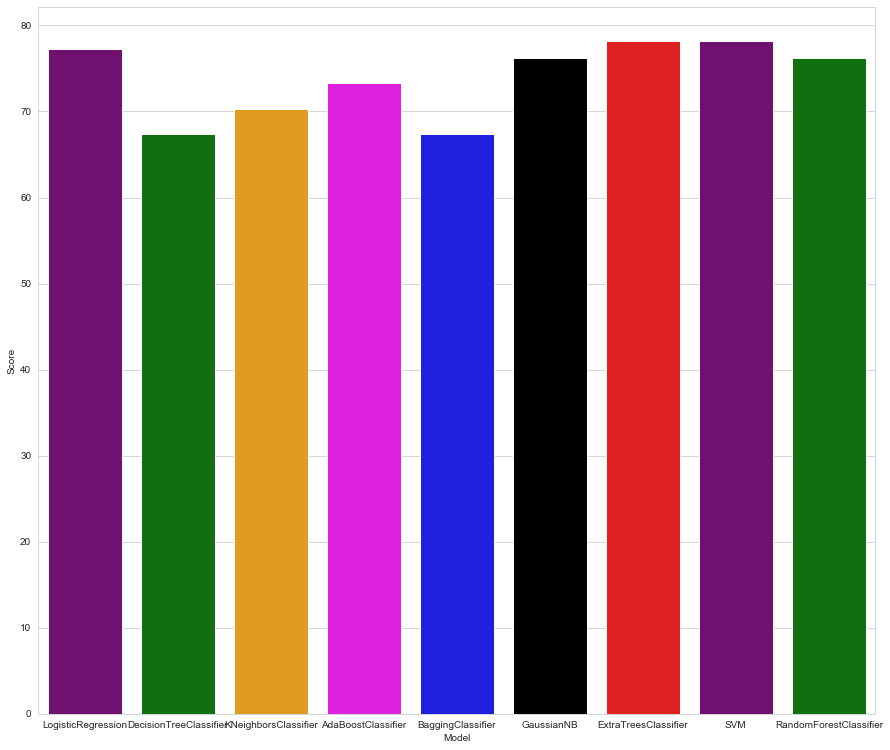

In [152]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,13))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [153]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Tumour_Stage,Tumour_Stage
0,36,0,0.080353,0.42638,0.54715,0.273680,0,0,0,0,1,1,0,1
1,43,0,-0.420320,0.57807,0.61447,-0.031505,2,0,0,0,0,0,1,0
2,69,0,0.213980,1.31140,-0.32747,-0.234260,0,0,0,0,2,1,0,1
3,56,0,0.345090,-0.21147,-0.19304,0.124270,0,0,0,0,1,1,1,0
4,56,0,0.221550,1.90680,0.52045,-0.311990,0,0,0,0,2,0,1,0


In [154]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 

In [155]:
kmns=cluster.KMeans(n_clusters=5)

In [156]:
kmns=kmns.fit(df[['Age','Surgery_type']])

In [157]:
kmns.cluster_centers_

array([[49.64      ,  1.7       ],
       [81.57142857,  1.57142857],
       [60.09183673,  1.39795918],
       [39.575     ,  1.45      ],
       [70.48148148,  1.40740741]])

In [185]:
df['Age by Surgery_type']=kmns.labels_

In [186]:
k_range=range(1,12)
wss=[]

In [187]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Surgery_type']])
    wss.append(km.inertia_)

In [188]:
wss

[56291.06886227545,
 18486.12449932018,
 8466.252078590114,
 5328.5070502295985,
 3828.9270297393864,
 2745.3040022769283,
 2052.27599433366,
 1663.7062947362947,
 1408.8632960780328,
 1190.4776201182622,
 1010.7073131028563]

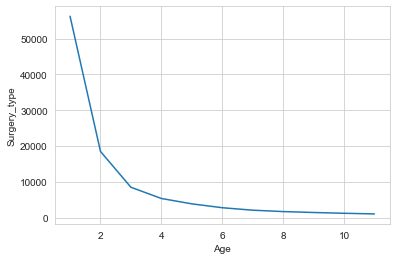

In [189]:
plt.xlabel('Age')
plt.ylabel('Surgery_type')
plt.plot(k_range,wss)

In [190]:
kmns=cluster.KMeans(n_clusters=5)

In [191]:
kmns=kmns.fit(df[['Age','Patient_Status']])

In [172]:
kmns.cluster_centers_

array([[59.77173913,  0.7826087 ],
       [69.38181818,  0.69090909],
       [39.575     ,  0.8       ],
       [49.64      ,  0.77      ],
       [80.9787234 ,  0.76595745]])

In [192]:
df['Age by Patient_Status']=kmns.labels_

In [193]:
k_range=range(1,16)
wss=[]

In [194]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Patient_Status']])
    wss.append(km.inertia_)

In [195]:
wss

[56001.99101796407,
 18256.551303632215,
 8180.060897226807,
 5025.9423295264805,
 3541.3705627364443,
 2442.3170198288985,
 1726.8655358906196,
 1375.3393702950307,
 1128.878527268408,
 951.2484016123996,
 782.1911331743829,
 650.7480476619301,
 556.8160641726708,
 468.9496733151417,
 424.1269850496193]

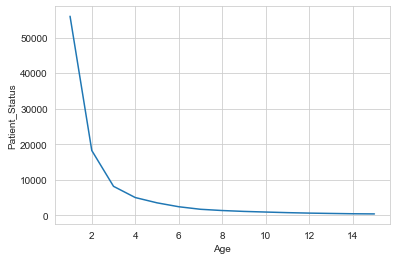

In [196]:
plt.xlabel('Age')
plt.ylabel('Patient_Status')
plt.plot(k_range,wss)

In [197]:
kmns=cluster.KMeans(n_clusters=5)

In [198]:
kmns=kmns.fit(df[['Age','Tumour_Stage']])

In [199]:
kmns.cluster_centers_

array([[48.7173913 ,  0.5326087 ,  0.34782609],
       [68.53448276,  0.68965517,  0.13793103],
       [80.62      ,  0.5       ,  0.16      ],
       [58.75757576,  0.55555556,  0.24242424],
       [38.94285714,  0.57142857,  0.25714286]])

In [200]:
df['Age by Tumour_Stage']=kmns.labels_

In [201]:
k_range=range(1,20)
wss=[]

In [203]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Tumour_Stage']])
    wss.append(km.inertia_)

In [204]:
wss

[56085.08383233533,
 18278.78558042112,
 8261.550623332398,
 5091.407830576356,
 3544.684397993311,
 2625.918080420574,
 1806.062534456246,
 1463.6958112589691,
 1218.557031128317,
 999.2338694970274,
 818.633883494624,
 716.8857077211917,
 636.1061149385133,
 567.0858666669851,
 489.7789190656076,
 441.0582901798757,
 394.4454920747014,
 370.2613453548349,
 337.2830425142378]

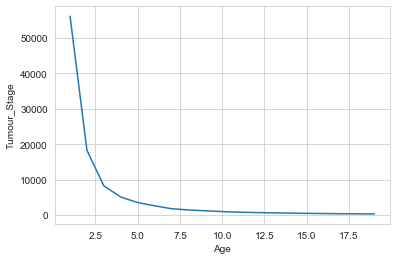

In [205]:
plt.xlabel('Age')
plt.ylabel('Tumour_Stage')
plt.plot(k_range,wss)

In [206]:
df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type',
       'Patient_Status', 'Tumour_Stage', 'Tumour_Stage',
       'Age and Surgery_type', '', 'Age and Patient_Status',
       'Age by Tumour_Stage', 'Age BY Surgery_type', 'Age by Surgery_type',
       'Age by Patient_Status'],
      dtype='object')

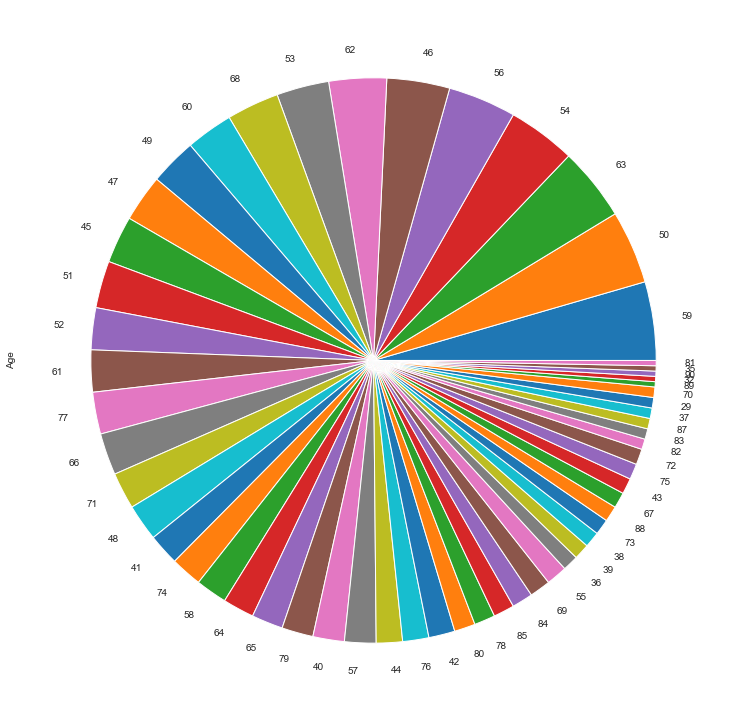

In [209]:
plt.figure(figsize = (15,13))
df.Age.value_counts().plot(kind='pie')

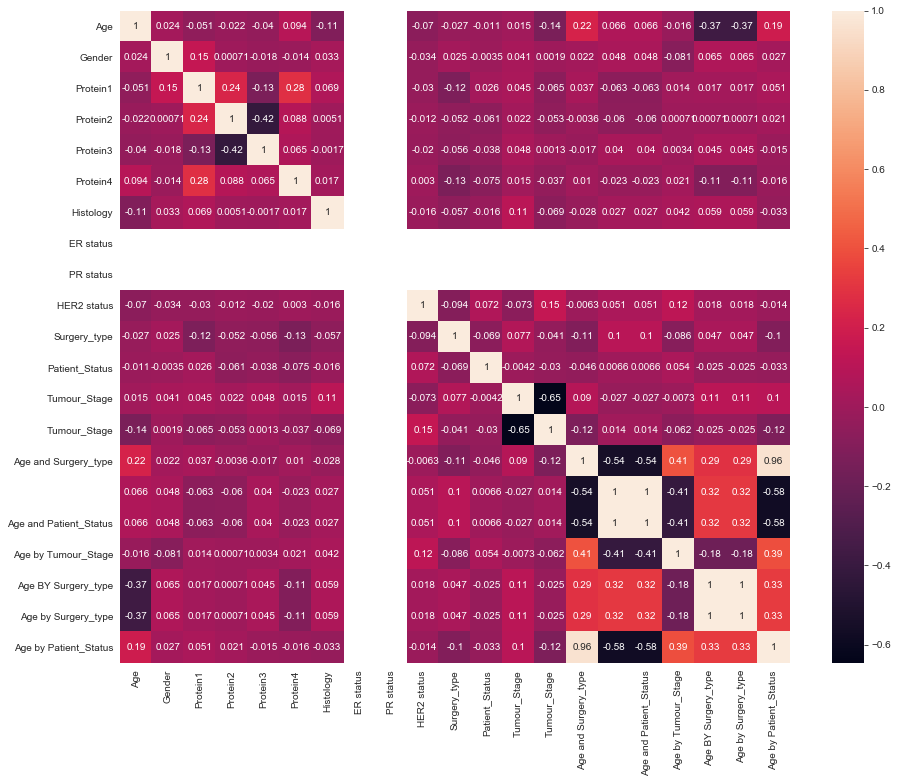

In [212]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

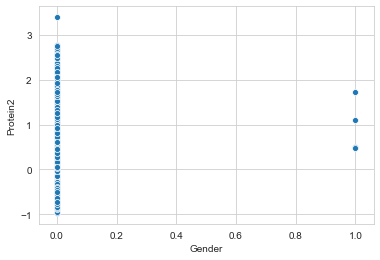

In [216]:
sns.scatterplot(x='Gender',y='Protein2',data=df)

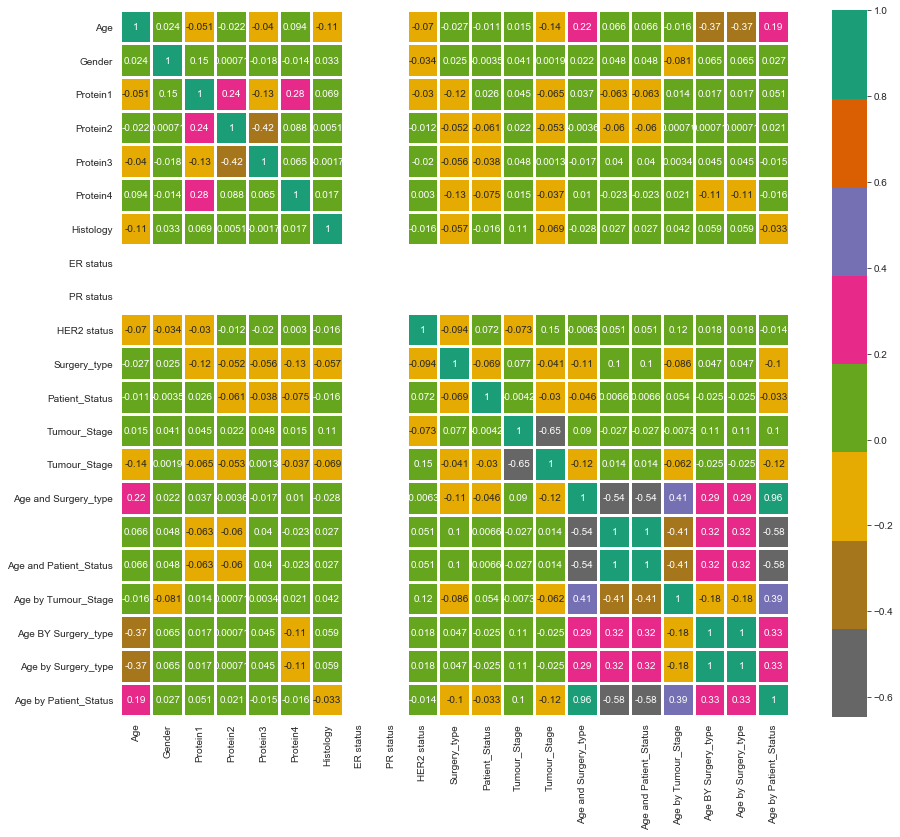

In [218]:
plt.figure(figsize=(15,13))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

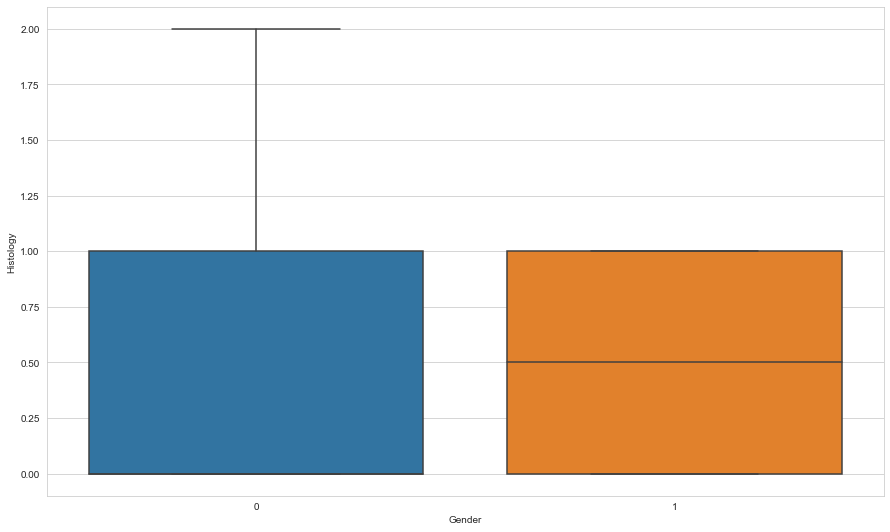

In [221]:
plt.figure(figsize=(15,9))
sns.boxplot(x='Gender',y='Age and Surgery_type',data=df)

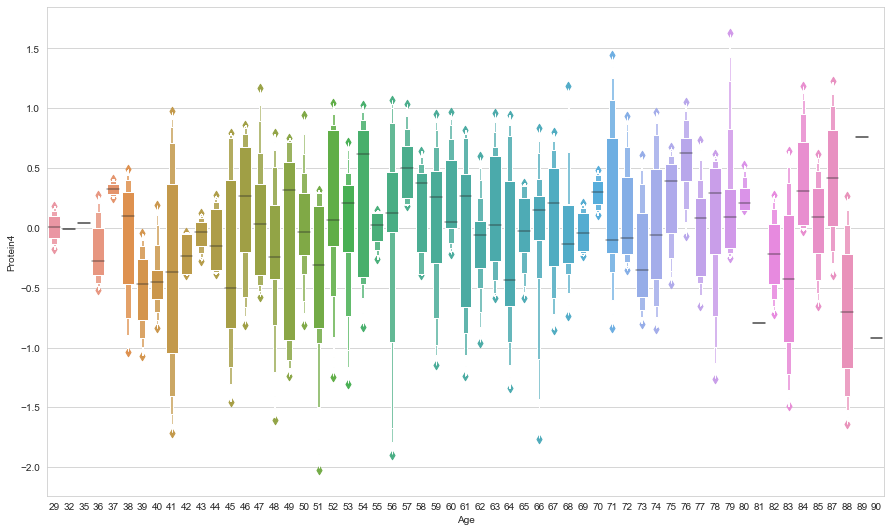

In [222]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='Age',y='Protein4',data=df)

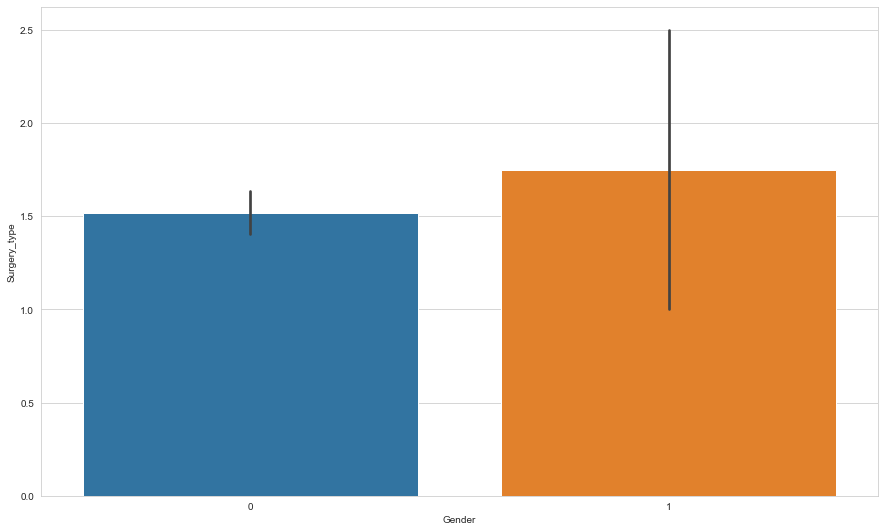

In [227]:
plt.figure(figsize=(15,9))
sns.barplot(x='Gender',y='Surgery_type',data=df)

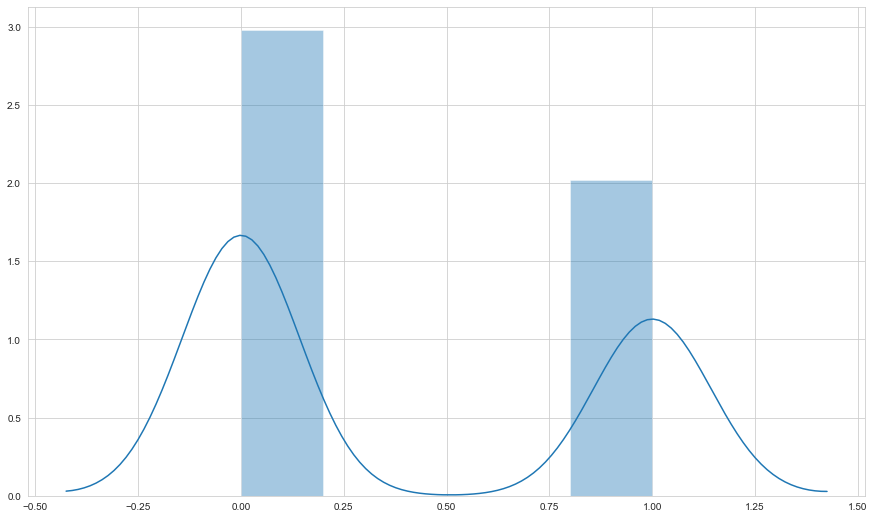

In [228]:
plt.figure(figsize=(15,9))
sns.distplot(df['Tumour_Stage'])

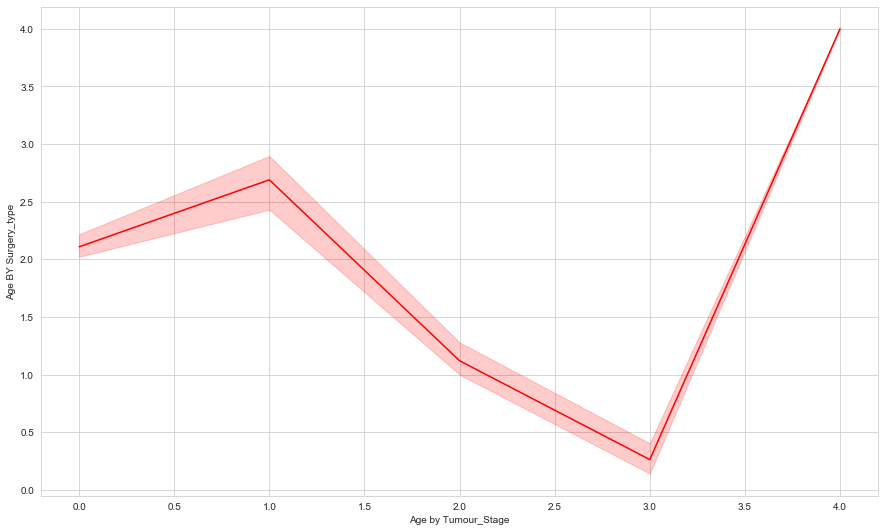

In [231]:
plt.figure(figsize=(15,9))
sns.lineplot(x='Age by Tumour_Stage', y='Age BY Surgery_type',data=df,color="red")

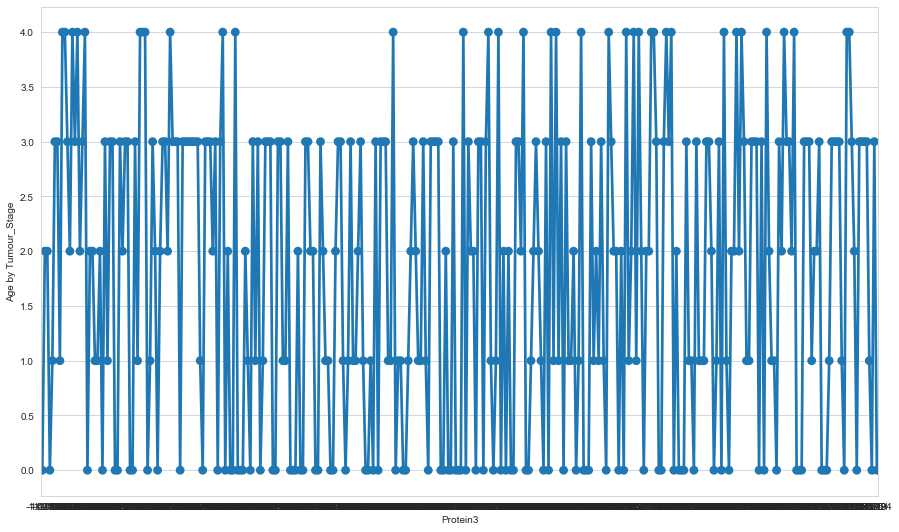

In [233]:
plt.figure(figsize=(15,9))
sns.pointplot(x='Protein3',y='Age by Tumour_Stage',data=df)

In [236]:
df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type',
       'Patient_Status', 'Tumour_Stage', 'Tumour_Stage',
       'Age and Surgery_type', '', 'Age and Patient_Status',
       'Age by Tumour_Stage', 'Age BY Surgery_type', 'Age by Surgery_type',
       'Age by Patient_Status'],
      dtype='object')

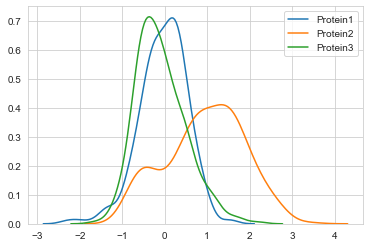

In [238]:
sns.kdeplot(df['Protein1'])
sns.kdeplot(df['Protein2'])
sns.kdeplot(df['Protein3'])

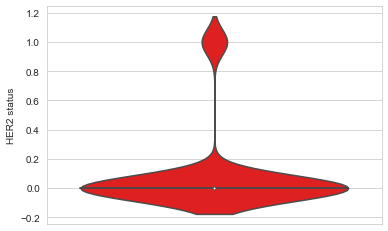

In [239]:
sns.violinplot(y="ER status",data=df)
sns.violinplot(y="PR status",data=df,color='orange')
sns.violinplot(y="HER2 status",data=df,color='red')

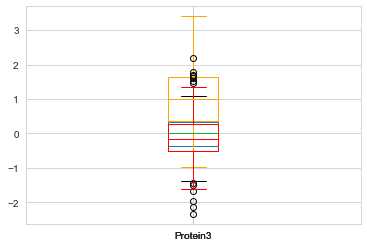

In [240]:
df.boxplot(column="Protein1")
df.boxplot(column="Protein2",color='orange')
df.boxplot(column="Protein3",color='red')

In [241]:
import sweetviz as sv

In [246]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [247]:
man=MinMaxScaler()
feat=['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type',
       'Patient_Status', 'Tumour_Stage', 'Tumour_Stage',
       'Age and Surgery_type', '', 'Age and Patient_Status',
       'Age by Tumour_Stage', 'Age BY Surgery_type', 'Age by Surgery_type',
       'Age by Patient_Status']
df[feat]=man.fit_transform(df[feat])
df[feat]

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Histology,ER status,PR status,HER2 status,...,Tumour_Stage,Tumour_Stage,Tumour_Stage,Age and Surgery_type,,Age and Patient_Status,Age by Tumour_Stage,Age BY Surgery_type,Age by Surgery_type,Age by Patient_Status
0,0.114754,0.0,0.615390,0.320733,0.569135,0.628982,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.75,0.50,0.50,1.00,1.00,1.00,0.75
1,0.229508,0.0,0.488138,0.355358,0.586754,0.545493,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.75,0.50,0.50,1.00,1.00,1.00,0.75
2,0.655738,0.0,0.649353,0.522750,0.340225,0.490026,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.00,0.25,0.25,0.25,0.75,0.75,1.00
3,0.442623,0.0,0.682676,0.175136,0.375408,0.588108,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.50,0.00,0.00,0.75,0.00,0.00,0.50
4,0.442623,0.0,0.651277,0.658657,0.562147,0.468761,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.50,0.00,0.00,0.75,0.00,0.00,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.114754,0.0,0.653882,0.364482,0.279944,0.412581,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.75,0.50,0.50,1.00,1.00,1.00,0.75
330,0.245902,1.0,0.781197,0.477166,0.355392,0.457017,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.75,0.50,0.50,0.00,1.00,1.00,0.75
331,0.524590,0.0,0.412106,0.805133,0.386610,0.647037,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.50,0.00,0.00,0.75,0.00,0.00,0.50
332,0.819672,0.0,0.716813,0.692691,0.286861,0.502550,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.25,1.00,1.00,0.50,0.25,0.25,0.25


In [248]:
std=StandardScaler()
feat=['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type',
       'Patient_Status', 'Tumour_Stage', 'Tumour_Stage',
       'Age and Surgery_type', '', 'Age and Patient_Status',
       'Age by Tumour_Stage', 'Age BY Surgery_type', 'Age by Surgery_type',
       'Age by Patient_Status']
df[feat]=std.fit_transform(df[feat])
df[feat]

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Histology,ER status,PR status,HER2 status,...,Tumour_Stage,Tumour_Stage,Tumour_Stage,Age and Surgery_type,,Age and Patient_Status,Age by Tumour_Stage,Age BY Surgery_type,Age by Surgery_type,Age by Patient_Status
0,-1.768397,-0.110096,0.196083,-0.571825,1.090802,0.420085,-0.622148,0.0,0.0,-0.308354,...,1.767330,-1.141687,1.767330,0.903718,0.092739,0.092739,1.591504,1.703237,1.703237,0.962023
1,-1.227513,-0.110096,-0.693617,-0.405183,1.206017,-0.065791,3.055684,0.0,0.0,-0.308354,...,-0.565825,0.875897,-0.565825,0.903718,0.092739,0.092739,1.591504,1.703237,1.703237,0.962023
2,0.781481,-0.110096,0.433539,0.400434,-0.406070,-0.388592,-0.622148,0.0,0.0,-0.308354,...,1.767330,-1.141687,1.767330,1.608956,-0.595593,-0.595593,-0.560570,0.958628,0.958628,1.674474
3,-0.223016,-0.110096,0.666522,-1.272551,-0.175999,0.182214,-0.622148,0.0,0.0,-0.308354,...,-0.565825,0.875897,-0.565825,0.198480,-1.283925,-1.283925,0.874146,-1.275198,-1.275198,0.249571
4,-0.223016,-0.110096,0.446991,1.054525,1.045106,-0.512344,-0.622148,0.0,0.0,-0.308354,...,-0.565825,0.875897,-0.565825,0.198480,-1.283925,-1.283925,0.874146,-1.275198,-1.275198,0.249571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,-1.768397,-0.110096,0.465205,-0.361273,-0.800252,-0.839292,-0.622148,0.0,0.0,3.243030,...,1.767330,-1.141687,1.767330,0.903718,0.092739,0.092739,1.591504,1.703237,1.703237,0.962023
330,-1.150244,9.082951,1.355344,0.181049,-0.306891,-0.580691,1.216768,0.0,0.0,-0.308354,...,-0.565825,0.875897,-0.565825,0.903718,0.092739,0.092739,-1.277928,1.703237,1.703237,0.962023
331,0.163329,-0.110096,-1.225209,1.759480,-0.102749,0.525162,-0.622148,0.0,0.0,-0.308354,...,-0.565825,0.875897,-0.565825,0.198480,-1.283925,-1.283925,0.874146,-1.275198,-1.275198,0.249571
332,1.554172,-0.110096,0.905192,1.218323,-0.755018,-0.315707,-0.622148,0.0,0.0,3.243030,...,-0.565825,-1.141687,-0.565825,-0.506758,1.469404,1.469404,0.156788,-0.530590,-0.530590,-0.462880
